In [1]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

C:\Users\Isabel\AppData\Local\Temp\ipykernel_5368\4192585259.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('world_data_full_apply_nulos.csv', index_col=0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [13]:
df_stats = df.select_dtypes(include=['int', 'float']).agg(['mean','median','std','min','max']).T
df_stats

,mean,median,std,min,max
density,1.345045e+02,8.300000e+01,1.573068e+02,1.265000e+00,8.470000e+02
agricultural_land,3.911755e+01,3.960000e+01,2.178305e+01,6.000000e-01,8.260000e+01
land_area,2.552127e+02,1.484600e+02,2.583850e+02,0.000000e+00,9.640000e+02
armed_forces_size,1.037831e+02,2.850000e+01,1.671580e+02,0.000000e+00,9.360000e+02
birth_rate,2.021497e+01,1.795000e+01,9.945774e+00,5.900000e+00,4.608000e+01
calling_code,3.605464e+02,2.555000e+02,3.232364e+02,1.000000e+00,1.876000e+03
co2-emissions,1.259155e+02,3.447700e+01,1.817949e+02,1.016000e+00,7.279730e+02
cpi,1.441936e+02,1.247400e+02,5.478400e+01,9.903000e+01,5.509300e+02
cpi_change,6.722346e+00,2.300000e+00,2.445041e+01,-4.300000e+00,2.549000e+02
fertility_rate,2.698138e+00,2.245000e+00,1.282267e+00,9.800000e-01,6.910000e+00


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [16]:
df.groupby('country')['density'].max().sort_values(ascending=False).reset_index().head(1)

,country,density
0,Palestinian National Authority,847.0


In [15]:
df[df['density'] == df_stats.loc['density', 'max']]

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
133,Palestinian National Authority,847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154,Asia


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [22]:
df_stats.loc['birth_rate', 'mean'].round(2)

20.21

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [32]:
df[['fertility_rate', 'life_expectancy']].corr(numeric_only = True, method = "pearson")


,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.849153
life_expectancy,-0.849153,1.000000


<Axes: xlabel='fertility_rate', ylabel='life_expectancy'>

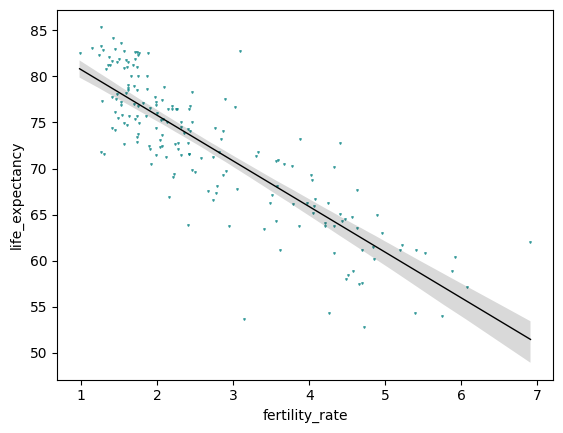

In [38]:
sns.regplot(x='fertility_rate',
            y='life_expectancy',
            data=df,
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws = {"color": "teal", "s": 1},
            marker='v'
            )

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

<Axes: xlabel='cpi', ylabel='Count'>

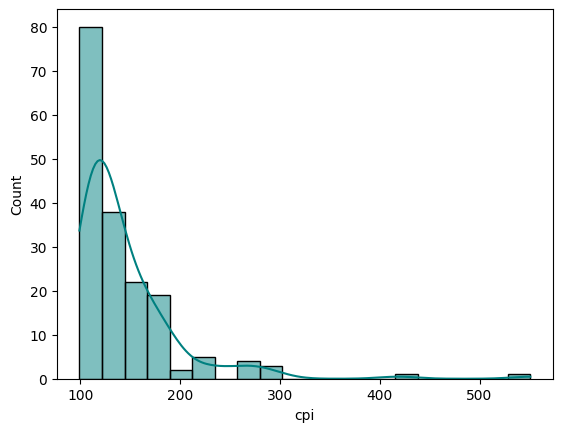

In [45]:
sns.histplot(x='cpi',
             data=df,
             bins =20,
             kde=True,
             color='teal')

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [49]:
df_copy=df.copy()

In [55]:
df_copy['PIB-Emisiones'] = df_copy['gdp'] - df_copy['co2-emissions']

df_copy[['country', 'PIB-Emisiones']][df_copy['PIB-Emisiones'] == df_copy['PIB-Emisiones'].max()]


,country,PIB-Emisiones
64,Germany,3.845630e+12


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [58]:
df_stats.loc['population_labor_force_participation', 'mean']

62.73806818181818

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [59]:
correlation = df.corr(numeric_only = True, method = "spearman")
correlation

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
density,1.000000,0.200302,-0.220539,0.125936,-0.176731,-0.109384,0.209351,-0.119915,-0.138960,-0.176856,-0.015206,0.104546,-0.004021,0.033382,-0.012201,-0.095937,0.135093,-0.098955,0.061765,0.014885,0.026946,-0.511743,-0.090923,0.094292,0.023721,-0.152447,-0.359084,0.116068,0.021248
agricultural_land,0.200302,1.000000,0.022158,0.173127,0.173660,-0.036252,0.015142,0.249278,0.232981,0.164436,-0.382159,0.031457,0.078430,-0.060903,-0.132087,0.200319,-0.221712,0.146761,-0.191189,0.111157,-0.080401,-0.140550,-0.150819,-0.072350,0.159252,0.055847,-0.025796,0.004682,-0.012907
land_area,-0.220539,0.022158,1.000000,0.384287,0.178757,-0.242378,0.166552,0.136854,0.224723,0.175796,-0.008680,-0.089567,0.171319,0.022693,-0.071133,0.222185,-0.176727,0.179866,-0.097304,0.112200,-0.210800,-0.398381,0.033388,-0.209875,0.162818,0.005533,-0.485771,-0.158250,0.047216
armed_forces_size,0.125936,0.173127,0.384287,1.000000,-0.118602,-0.241026,0.477055,0.094123,0.084370,-0.095454,-0.153847,-0.197941,0.696120,-0.000946,0.255177,-0.104961,0.162024,-0.130828,0.097284,0.259397,0.120254,0.806751,-0.121036,-0.234878,0.162857,-0.090453,0.476780,0.123754,0.234507
birth_rate,-0.176731,0.173660,0.178757,-0.118602,1.000000,0.164103,-0.246307,0.391884,0.237546,0.980987,-0.084387,-0.302687,-0.416506,0.064180,-0.787452,0.895507,-0.859974,0.856945,-0.657015,0.245818,-0.845314,0.349382,0.213206,-0.397999,0.168458,-0.055770,0.106992,-0.596338,0.040054
calling_code,-0.109384,-0.036252,-0.242378,-0.241026,0.164103,1.000000,-0.265872,0.105980,-0.016856,0.164907,-0.085191,-0.143463,-0.356442,-0.068676,-0.227563,0.106171,-0.154025,0.051555,-0.151760,-0.054249,-0.074278,0.047469,0.084262,0.005102,-0.334636,-0.091476,-0.163097,-0.043635,0.304064
co2-emissions,0.209351,0.015142,0.166552,0.477055,-0.246307,-0.265872,1.000000,-0.142751,-0.131654,-0.205801,0.003200,0.031760,0.300473,0.080741,0.266869,-0.254783,0.261146,-0.292307,0.378285,-0.180222,0.192914,-0.345963,-0.148427,0.023486,0.065845,-0.002232,-0.349605,0.136520,0.060003
cpi,-0.119915,0.249278,0.136854,0.094123,0.391884,0.105980,-0.142751,1.000000,0.804287,0.359507,-0.091008,-0.325114,0.008686,0.149329,-0.291723,0.419904,-0.422903,0.415222,-0.475015,0.185645,-0.293830,0.219941,0.039076,-0.320285,0.092007,0.023119,0.265291,-0.261395,0.164743
cpi_change,-0.138960,0.232981,0.224723,0.084370,0.237546,-0.016856,-0.131654,0.804287,1.000000,0.216461,-0.033153,-0.146547,0.020980,0.043075,-0.173455,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.201357,-0.048238,-0.237048,0.095983,0.159493,0.153673,-0.103437,0.034444
fertility_rate,-0.176856,0.164436,0.175796,-0.095454,0.980987,0.164907,-0.205801,0.359507,0.216461,1.000000,-0.071624,-0.280087,-0.417396,0.050522,-0.760185,0.867469,-0.843047,0.830900,-0.604140,0.187757,-0.817209,0.174954,0.191111,-0.391246,0.171121,-0.071483,-0.020917,-0.578658,0.037592


<Axes: >

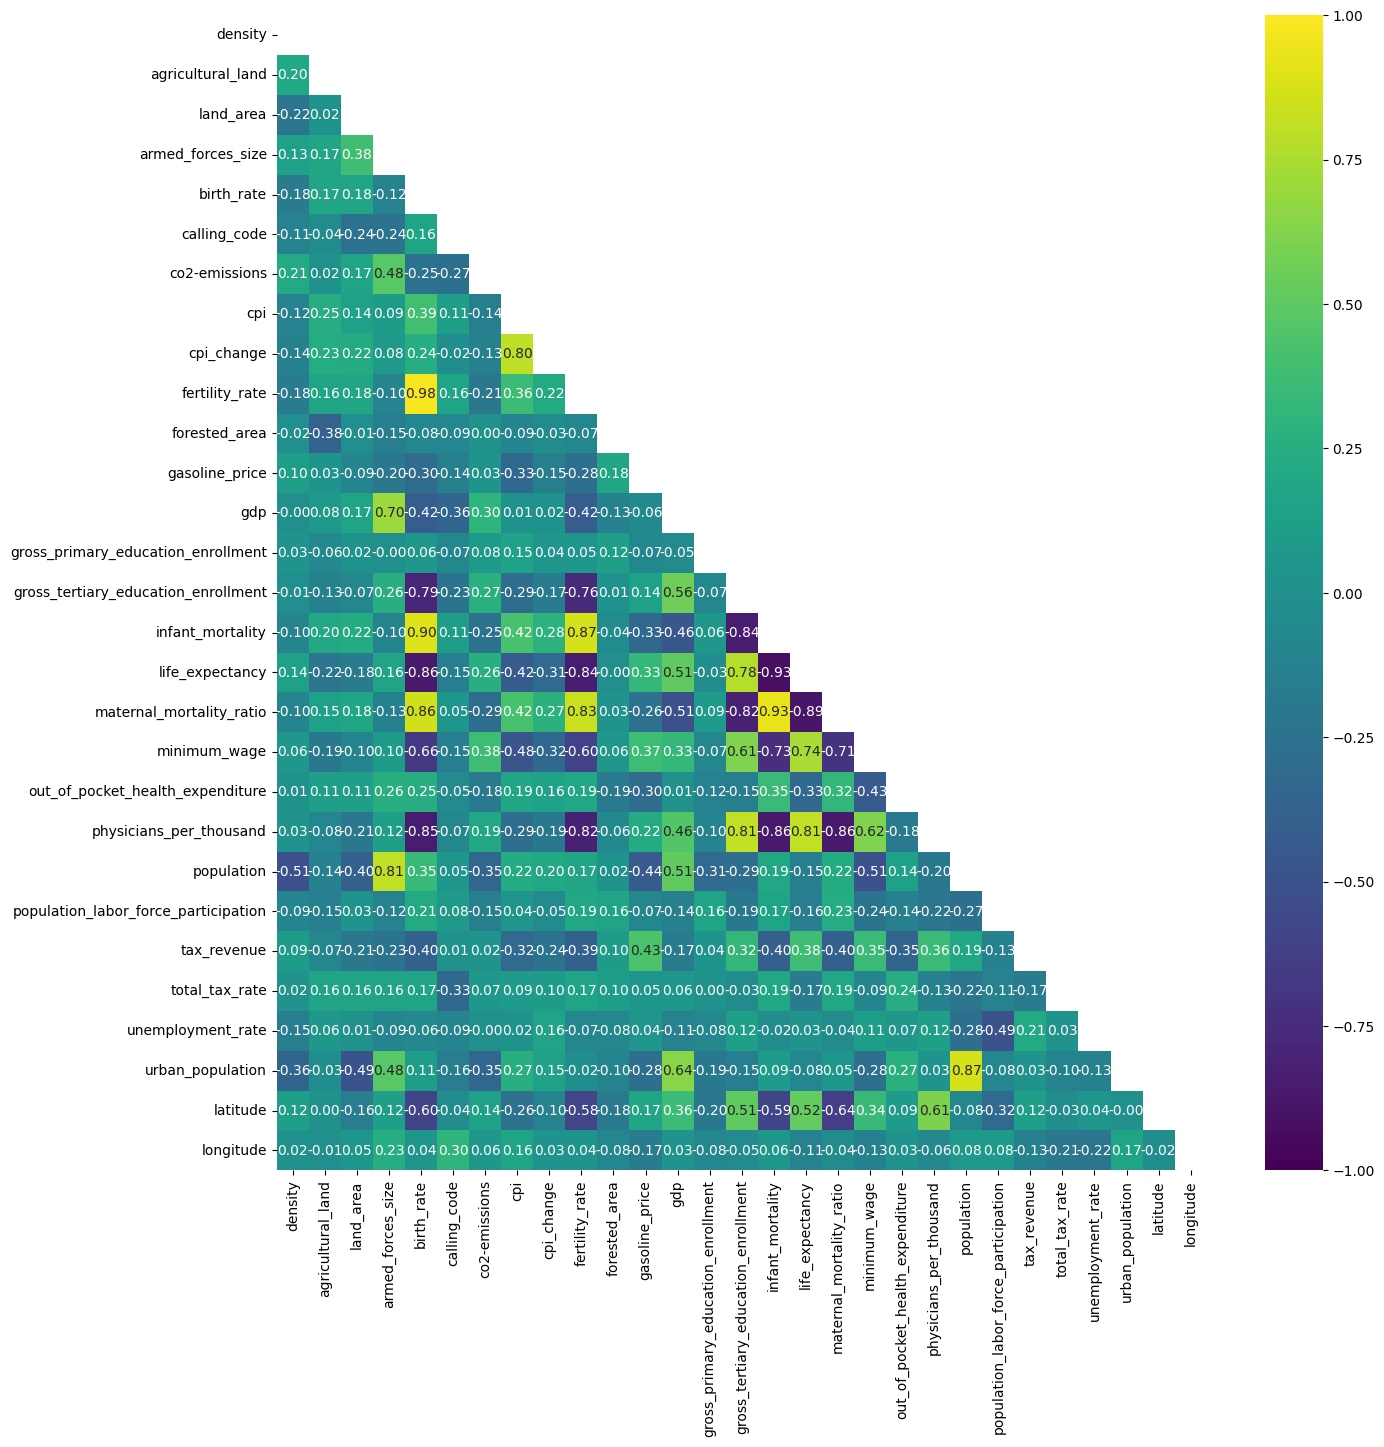

In [62]:
plt.figure(figsize=(15,15))

mask= np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            mask=mask,
            vmax=1,
            vmin=-1
            )